In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\sunny\Desktop\DS Material\Data Set\Churn_Modelling full.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [4]:
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [5]:
oe = OrdinalEncoder()

x.loc[:,'Geography' : 'Gender'] = oe.fit_transform(x.loc[:,'Geography':'Gender'])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52


In [6]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2, random_state=1)

In [8]:
ann = Sequential()

ann.add(Dense(units= 30, activation= 'relu'))
ann.add(Dense(units=20, activation= 'relu'))

ann.add(Dense(units=1, activation= 'sigmoid'))

ann.compile(optimizer= 'adam', loss= 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data= (xtest,ytest), epochs= 250)

Epoch 1/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4713 - val_loss: 0.4220
Epoch 2/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4142 - val_loss: 0.3896
Epoch 3/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3879 - val_loss: 0.3702
Epoch 4/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3713 - val_loss: 0.3570
Epoch 5/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3623 - val_loss: 0.3518
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3577 - val_loss: 0.3465
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3535 - val_loss: 0.3449
Epoch 8/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3502 - val_loss: 0.3443
Epoch 9/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3468 - val_loss: 0.3442
Epoch 10/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3448 - val_lo

250/250 [==============================] - 1s 2ms/step - loss: 0.2980 - val_loss: 0.3424
Epoch 82/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2987 - val_loss: 0.3501
Epoch 83/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2990 - val_loss: 0.3444
Epoch 84/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2990 - val_loss: 0.3418
Epoch 85/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2980 - val_loss: 0.3434
Epoch 86/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2984 - val_loss: 0.3431
Epoch 87/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2972 - val_loss: 0.3448
Epoch 88/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2971 - val_loss: 0.3482
Epoch 89/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2972 - val_loss: 0.3452
Epoch 90/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2968 - val_loss: 

Epoch 161/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2829 - val_loss: 0.3577
Epoch 162/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2829 - val_loss: 0.3602
Epoch 163/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2828 - val_loss: 0.3554
Epoch 164/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2823 - val_loss: 0.3568
Epoch 165/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2817 - val_loss: 0.3584
Epoch 166/250
250/250 [==============================] - 1s 3ms/step - loss: 0.2819 - val_loss: 0.3585
Epoch 167/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2820 - val_loss: 0.3576
Epoch 168/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2817 - val_loss: 0.3532
Epoch 169/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2819 - val_loss: 0.3557
Epoch 170/250
250/250 [==============================] - 1s 2ms/step - lo

250/250 [==============================] - 1s 2ms/step - loss: 0.2723 - val_loss: 0.3701
Epoch 241/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2727 - val_loss: 0.3675
Epoch 242/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2728 - val_loss: 0.3700
Epoch 243/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2722 - val_loss: 0.3731
Epoch 244/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2711 - val_loss: 0.3668
Epoch 245/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2723 - val_loss: 0.3695
Epoch 246/250
250/250 [==============================] - 1s 2ms/step - loss: 0.2716 - val_loss: 0.3687
Epoch 247/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2713 - val_loss: 0.3693
Epoch 248/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2711 - val_loss: 0.3745
Epoch 249/250
250/250 [==============================] - 0s 2ms/step - loss: 0.2718 - v

<AxesSubplot:>

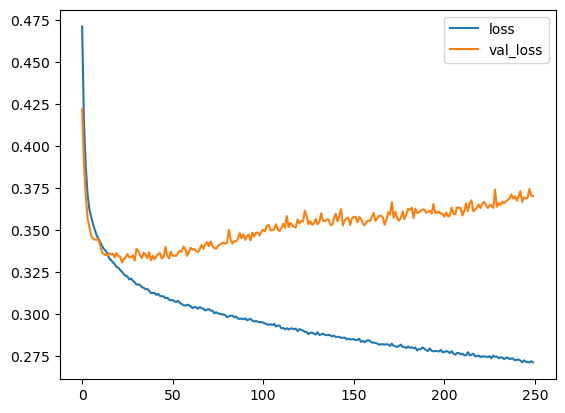

In [11]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

#    Early Stopping

In [12]:
early = EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 25)

In [14]:
ann = Sequential()

ann.add(Dense(units=30, activation= 'relu'))
ann.add(Dense(units=20, activation= 'relu'))
ann.add(Dense(units=1, activation= 'sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks= [early], epochs = 250)


Epoch 1/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4790 - val_loss: 0.4325
Epoch 2/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4151 - val_loss: 0.4036
Epoch 3/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3863 - val_loss: 0.3755
Epoch 4/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3650 - val_loss: 0.3592
Epoch 5/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3545 - val_loss: 0.3507
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3497 - val_loss: 0.3475
Epoch 7/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3450 - val_loss: 0.3430
Epoch 8/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3425 - val_loss: 0.3432
Epoch 9/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3408 - val_loss: 0.3407
Epoch 10/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3378 - val_lo

In [15]:
early_loss = pd.DataFrame(ann.history.history)

<AxesSubplot:>

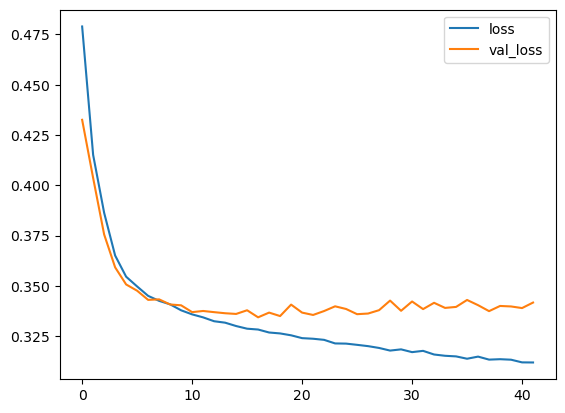

In [16]:
early_loss.plot()

#  Drop Out layer

In [20]:
ann = Sequential()

ann.add(Dense(units= 30, activation= 'relu'))
ann.add(Dropout(rate = 0.5))

ann.add(Dense(units= 20, activation= 'relu'))
ann.add(Dropout(rate = 0.5))

ann.add(Dense(units=1, activation= 'sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs= 250)

Epoch 1/250
250/250 [==============================] - 1s 2ms/step - loss: 0.5369 - val_loss: 0.4570
Epoch 2/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4949 - val_loss: 0.4394
Epoch 3/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4759 - val_loss: 0.4301
Epoch 4/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4581 - val_loss: 0.4241
Epoch 5/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4521 - val_loss: 0.4166
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4471 - val_loss: 0.4089
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4363 - val_loss: 0.4034
Epoch 8/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.3991
Epoch 9/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4274 - val_loss: 0.3945
Epoch 10/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4205 - val_lo

250/250 [==============================] - 0s 2ms/step - loss: 0.3680 - val_loss: 0.3476
Epoch 82/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3693 - val_loss: 0.3478
Epoch 83/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3703 - val_loss: 0.3493
Epoch 84/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3730 - val_loss: 0.3489
Epoch 85/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3721 - val_loss: 0.3455
Epoch 86/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3717 - val_loss: 0.3455
Epoch 87/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3714 - val_loss: 0.3490
Epoch 88/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3709 - val_loss: 0.3467
Epoch 89/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3649 - val_loss: 0.3466
Epoch 90/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3665 - val_loss: 

Epoch 161/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3705 - val_loss: 0.3467
Epoch 162/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3644 - val_loss: 0.3438
Epoch 163/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3620 - val_loss: 0.3438
Epoch 164/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3670 - val_loss: 0.3435
Epoch 165/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3669 - val_loss: 0.3434
Epoch 166/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3640 - val_loss: 0.3427
Epoch 167/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3669 - val_loss: 0.3448
Epoch 168/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3706 - val_loss: 0.3443
Epoch 169/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3658 - val_loss: 0.3446
Epoch 170/250
250/250 [==============================] - 1s 2ms/step - lo

250/250 [==============================] - 0s 2ms/step - loss: 0.3645 - val_loss: 0.3432
Epoch 241/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3689 - val_loss: 0.3405
Epoch 242/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3646 - val_loss: 0.3416
Epoch 243/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3643 - val_loss: 0.3429
Epoch 244/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3629 - val_loss: 0.3408
Epoch 245/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3647 - val_loss: 0.3456
Epoch 246/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3665 - val_loss: 0.3436
Epoch 247/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3631 - val_loss: 0.3447
Epoch 248/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3598 - val_loss: 0.3427
Epoch 249/250
250/250 [==============================] - 0s 2ms/step - loss: 0.3681 - v

<AxesSubplot:>

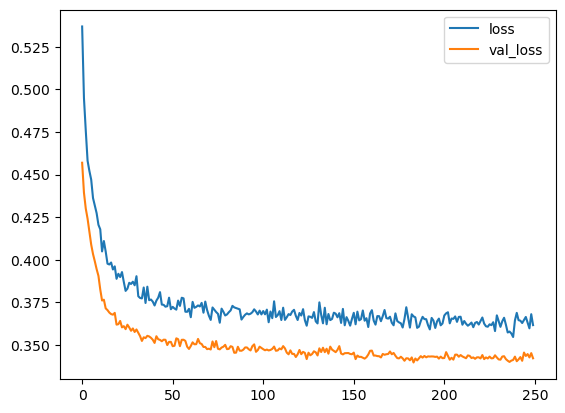

In [22]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early stopping + Drop out layer

In [24]:
ann = Sequential()

ann.add(Dense(units=30, activation= 'relu'))
ann.add(Dropout(rate= 0.5))

ann.add(Dense(units= 20, activation= 'relu'))
ann.add(Dropout(rate = 0.5))

ann.add(Dense(units=1, activation= 'sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs = 250)

Epoch 1/250
250/250 [==============================] - 1s 3ms/step - loss: 0.5993 - val_loss: 0.4664
Epoch 2/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4901 - val_loss: 0.4353
Epoch 3/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4733 - val_loss: 0.4280
Epoch 4/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4638 - val_loss: 0.4233
Epoch 5/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4551 - val_loss: 0.4205
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4481 - val_loss: 0.4160
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4463 - val_loss: 0.4132
Epoch 8/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4404 - val_loss: 0.4077
Epoch 9/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4404 - val_loss: 0.4068
Epoch 10/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4264 - val_lo

250/250 [==============================] - 0s 2ms/step - loss: 0.3724 - val_loss: 0.3490
Epoch 82/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3715 - val_loss: 0.3478
Epoch 83/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3753 - val_loss: 0.3479
Epoch 84/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3690 - val_loss: 0.3487


<AxesSubplot:>

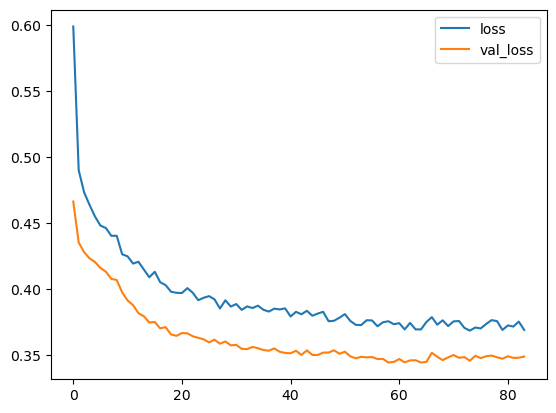

In [26]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

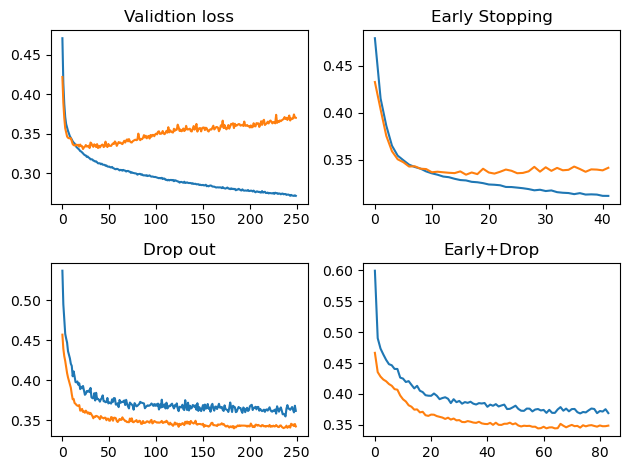

In [33]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validtion loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('Drop out')


plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+Drop')

plt.tight_layout()